In [1]:
import pandas as pd
import datetime as datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import random
pd.set_option('display.max_colwidth', -1)

<ipython-input-1-d18ff894e6a6>:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
jp = pd.read_csv('jeopardy.csv')

# Data Wrangling
I will investigate the data to see if I have to clean up some mess!

In [3]:
jp

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,"The city of Yuma in this state has a record average of 4,055 hours of sunshine each year",Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", this company served its billionth burger",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Constitution of Mass., second President of the United States",John Adams
...,...,...,...,...,...,...,...
216925,4999,2006-05-11,Double Jeopardy!,RIDDLE ME THIS,$2000,This Puccini opera turns on the solution to 3 riddles posed by the heroine,Turandot
216926,4999,2006-05-11,Double Jeopardy!,"""T"" BIRDS",$2000,"In North America this term is properly applied to only 4 species that are crested, including the tufted",a titmouse
216927,4999,2006-05-11,Double Jeopardy!,AUTHORS IN THEIR YOUTH,$2000,"In Penny Lane, where this ""Hellraiser"" grew up, the barber shaves another customer--then flays him alive!",Clive Barker
216928,4999,2006-05-11,Double Jeopardy!,QUOTATIONS,$2000,"From Ft. Sill, Okla. he made the plea, Arizona is my land, my home, my father's land, to which I now ask to... return""",Geronimo


In [4]:
jp.shape

(216930, 7)

In [5]:
jp.columns

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')

Gotcha! Columns names have a space at the beginning. I need to get rid of that empty space!

In [6]:
jp.columns = map(str.strip,jp.columns)

In [7]:
jp.columns

Index(['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')

### 1. Write a function that filters the dataset for questions that contains all of the words in a list of words and their values.

In [8]:
def filter_dataset(data,words):
    filter = lambda x: all(word.lower() in x.lower() for word in words)
    return data[data['Question'].apply(filter)]

In [9]:
filter_dataset(jp,['King','England'])

,Show Number,Air Date,Round,Category,Value,Question,Answer
4953,3003,1997-09-24,Double Jeopardy!,"""PH""UN WORDS",$200,"Both England's King George V & FDR put their stamp of approval on this ""King of Hobbies""",Philately (stamp collecting)
6337,3517,1999-12-14,Double Jeopardy!,Y1K,$800,"In retaliation for Viking raids, this ""Unready"" king of England attacks Norse areas of the Isle of Man",Ethelred
9191,3907,2001-09-04,Double Jeopardy!,WON THE BATTLE,$800,This king of England beat the odds to trounce the French in the 1415 Battle of Agincourt,Henry V
11710,2903,1997-03-26,Double Jeopardy!,BRITISH MONARCHS,$600,"This Scotsman, the first Stuart king of England, was called ""The Wisest Fool in Christendom""",James I
13454,4726,2005-03-07,Jeopardy!,A NUMBER FROM 1 TO 10,$1000,It's the number that followed the last king of England named William,4
...,...,...,...,...,...,...,...
208295,4621,2004-10-11,Jeopardy!,THE VIKINGS,$600,In 1066 this great-great grandson of Rollo made what some call the last Viking invasion of England,William the Conqueror
208742,4863,2005-11-02,Double Jeopardy!,BEFORE & AFTER,"$3,000",Dutch-born king who ruled England jointly with Mary II & is a tasty New Zealand fish,William of Orange roughy
213870,5856,2010-02-15,Double Jeopardy!,URANUS,$1600,In 1781 William Herschel discovered Uranus & initially named it after this king of England,George III
216021,1881,1992-11-09,Double Jeopardy!,HISTORIC NAMES,$1000,"His nickname was ""Bertie"", but he used this name & number when he became king of England in 1901",Edward VII


In [10]:
jp.Value.unique()

array(['$200', '$400', '$600', '$800', '$2,000', '$1000', '$1200',
       '$1600', '$2000', '$3,200', 'None', '$5,000', '$100', '$300',
       '$500', '$1,000', '$1,500', '$1,200', '$4,800', '$1,800', '$1,100',
       '$2,200', '$3,400', '$3,000', '$4,000', '$1,600', '$6,800',
       '$1,900', '$3,100', '$700', '$1,400', '$2,800', '$8,000', '$6,000',
       '$2,400', '$12,000', '$3,800', '$2,500', '$6,200', '$10,000',
       '$7,000', '$1,492', '$7,400', '$1,300', '$7,200', '$2,600',
       '$3,300', '$5,400', '$4,500', '$2,100', '$900', '$3,600', '$2,127',
       '$367', '$4,400', '$3,500', '$2,900', '$3,900', '$4,100', '$4,600',
       '$10,800', '$2,300', '$5,600', '$1,111', '$8,200', '$5,800',
       '$750', '$7,500', '$1,700', '$9,000', '$6,100', '$1,020', '$4,700',
       '$2,021', '$5,200', '$3,389', '$4,200', '$5', '$2,001', '$1,263',
       '$4,637', '$3,201', '$6,600', '$3,700', '$2,990', '$5,500',
       '$14,000', '$2,700', '$6,400', '$350', '$8,600', '$6,300', '$250',
    

In [11]:
jp.Value.replace('None',0)

0         $200 
1         $200 
2         $200 
3         $200 
4         $200 
          ...  
216925    $2000
216926    $2000
216927    $2000
216928    $2000
216929    0    
Name: Value, Length: 216930, dtype: object

In [12]:
jp

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,"The city of Yuma in this state has a record average of 4,055 hours of sunshine each year",Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", this company served its billionth burger",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Constitution of Mass., second President of the United States",John Adams
...,...,...,...,...,...,...,...
216925,4999,2006-05-11,Double Jeopardy!,RIDDLE ME THIS,$2000,This Puccini opera turns on the solution to 3 riddles posed by the heroine,Turandot
216926,4999,2006-05-11,Double Jeopardy!,"""T"" BIRDS",$2000,"In North America this term is properly applied to only 4 species that are crested, including the tufted",a titmouse
216927,4999,2006-05-11,Double Jeopardy!,AUTHORS IN THEIR YOUTH,$2000,"In Penny Lane, where this ""Hellraiser"" grew up, the barber shaves another customer--then flays him alive!",Clive Barker
216928,4999,2006-05-11,Double Jeopardy!,QUOTATIONS,$2000,"From Ft. Sill, Okla. he made the plea, Arizona is my land, my home, my father's land, to which I now ask to... return""",Geronimo


In [13]:
jp['modified_value'] = jp.Value.apply(lambda x: x.replace('$',''))
jp['modified_value'] = jp['modified_value'].apply(lambda x: x.replace(',',''))
jp['modified_value'] = jp['modified_value'].apply(lambda x: x.replace('None','0'))
jp['modified_value'] = jp['modified_value'].astype(float)
jp['modified_value'].mean()

739.9884755451067

In [14]:
jp[(jp['Category'] == 'BEFORE & AFTER') & (jp['Answer'] == 'William of Orange roughy')]

,Show Number,Air Date,Round,Category,Value,Question,Answer,modified_value
208742,4863,2005-11-02,Double Jeopardy!,BEFORE & AFTER,"$3,000",Dutch-born king who ruled England jointly with Mary II & is a tasty New Zealand fish,William of Orange roughy,3000.0


In [15]:
def filter_values(data,words):
    df = filter_dataset(data,words)
    return df.modified_value.mean()

In [16]:
filter_values(jp,['King','England'])

886.8421052631579

In [17]:
def unique_answer_filter(data,words):
    df = filter_dataset(data,words)
    return df.Question.value_counts()
    

In [18]:
computer = filter_dataset(jp,['computer'])

In [19]:
computer

,Show Number,Air Date,Round,Category,Value,Question,Answer,modified_value
309,5690,2009-05-08,Jeopardy!,OLD FOLKS IN THEIR 30s,$600,Linus Torvalds is the father of this operating system used on cell phones & supercomputers,Linux,600.0
342,5690,2009-05-08,Double Jeopardy!,MATHEM-ATTACK!,$1200,"(<a href=""http://www.j-archive.com/media/2009-05-08_DJ_28.jpg"" target=""_blank"">Kelly of the Clue Crew shows an array of numbers enclosed in brackets on the monitor.</a>) A set of numbers in rows and columns can be used in many ways--for example, to encrypt a code or create 3-D computer graphics; the set shares this name with a 1999 film",a matrix,1200.0
1106,4085,2002-05-10,Double Jeopardy!,"""EN"" THE BEGINNING",$800,"2-word term for the consumer, for whom a computer is ultimately designed",an end user,800.0
1430,4960,2006-03-17,Jeopardy!,RECORD LOSSES IN 2005,$200,"A computer with 98,000 names & SSNs was reported stolen from this oldest campus of the Univ. of Calif.",Berkeley,200.0
2410,3214,1998-07-16,Jeopardy!,PRE-COLUMBIAN CULTURES,$500,Warriors of this Yucatan civilization battle in the computer-enhanced mural seen here:,Mayans,500.0
...,...,...,...,...,...,...,...,...
215116,6036,2010-12-06,Double Jeopardy!,"WHAT HAPPENED TO THE ""MOTHER""s?",$400,The main circuitry of a computer is found here,the motherboard,400.0
215539,4216,2002-12-23,Double Jeopardy!,WORDS WITHIN WORDS,$1600,You may have to do this to a computer disk to enable it to store information,format (in(format)ion),1600.0
216299,5236,2007-05-21,Double Jeopardy!,FORBES' CARS FOR THE RICH,$400,This get personal for a personal computer mogul Michael Dell in a 2005 H2 from this manufacturer,Hummer,400.0
216527,3038,1997-11-12,Jeopardy!,COMPUTERESE,$400,"Like a waiter, a network computer might say ""I'll be your"" this & store files or manage printers",Server,400.0


In [20]:
computer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431 entries, 309 to 216533
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Show Number     431 non-null    int64  
 1   Air Date        431 non-null    object 
 2   Round           431 non-null    object 
 3   Category        431 non-null    object 
 4   Value           431 non-null    object 
 5   Question        431 non-null    object 
 6   Answer          431 non-null    object 
 7   modified_value  431 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 30.3+ KB


In [21]:
computer['Year_Date'] = computer['Air Date'].apply(lambda x: x.split('-',1))
computer['Year'] = computer['Year_Date'].apply(lambda x: x[0])
computer['Year'] = computer['Year'].astype(int)

<ipython-input-21-2296db204f5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  computer['Year_Date'] = computer['Air Date'].apply(lambda x: x.split('-',1))
<ipython-input-21-2296db204f5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  computer['Year'] = computer['Year_Date'].apply(lambda x: x[0])
<ipython-input-21-2296db204f5e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [22]:
computer

,Show Number,Air Date,Round,Category,Value,Question,Answer,modified_value,Year_Date,Year
309,5690,2009-05-08,Jeopardy!,OLD FOLKS IN THEIR 30s,$600,Linus Torvalds is the father of this operating system used on cell phones & supercomputers,Linux,600.0,"[2009, 05-08]",2009
342,5690,2009-05-08,Double Jeopardy!,MATHEM-ATTACK!,$1200,"(<a href=""http://www.j-archive.com/media/2009-05-08_DJ_28.jpg"" target=""_blank"">Kelly of the Clue Crew shows an array of numbers enclosed in brackets on the monitor.</a>) A set of numbers in rows and columns can be used in many ways--for example, to encrypt a code or create 3-D computer graphics; the set shares this name with a 1999 film",a matrix,1200.0,"[2009, 05-08]",2009
1106,4085,2002-05-10,Double Jeopardy!,"""EN"" THE BEGINNING",$800,"2-word term for the consumer, for whom a computer is ultimately designed",an end user,800.0,"[2002, 05-10]",2002
1430,4960,2006-03-17,Jeopardy!,RECORD LOSSES IN 2005,$200,"A computer with 98,000 names & SSNs was reported stolen from this oldest campus of the Univ. of Calif.",Berkeley,200.0,"[2006, 03-17]",2006
2410,3214,1998-07-16,Jeopardy!,PRE-COLUMBIAN CULTURES,$500,Warriors of this Yucatan civilization battle in the computer-enhanced mural seen here:,Mayans,500.0,"[1998, 07-16]",1998
...,...,...,...,...,...,...,...,...,...,...
215116,6036,2010-12-06,Double Jeopardy!,"WHAT HAPPENED TO THE ""MOTHER""s?",$400,The main circuitry of a computer is found here,the motherboard,400.0,"[2010, 12-06]",2010
215539,4216,2002-12-23,Double Jeopardy!,WORDS WITHIN WORDS,$1600,You may have to do this to a computer disk to enable it to store information,format (in(format)ion),1600.0,"[2002, 12-23]",2002
216299,5236,2007-05-21,Double Jeopardy!,FORBES' CARS FOR THE RICH,$400,This get personal for a personal computer mogul Michael Dell in a 2005 H2 from this manufacturer,Hummer,400.0,"[2007, 05-21]",2007
216527,3038,1997-11-12,Jeopardy!,COMPUTERESE,$400,"Like a waiter, a network computer might say ""I'll be your"" this & store files or manage printers",Server,400.0,"[1997, 11-12]",1997


In [23]:
years = computer['Year']

Text(0.5, 1.0, "Number of times 'Computer' appeared on Jeopardy by Year")

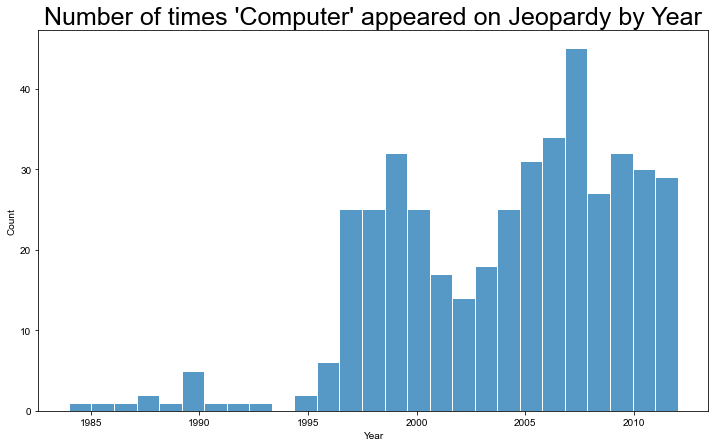

In [24]:
f,ax=plt.subplots(figsize=(12,7))
sns.set_style('white')
sns.histplot(data=computer,x='Year',bins=27)
ax.set_title("Number of times 'Computer' appeared on Jeopardy by Year",fontsize=25)


In [25]:
jp

,Show Number,Air Date,Round,Category,Value,Question,Answer,modified_value
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",Copernicus,200.0
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",Jim Thorpe,200.0
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,"The city of Yuma in this state has a record average of 4,055 hours of sunshine each year",Arizona,200.0
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", this company served its billionth burger",McDonald's,200.0
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Constitution of Mass., second President of the United States",John Adams,200.0
...,...,...,...,...,...,...,...,...
216925,4999,2006-05-11,Double Jeopardy!,RIDDLE ME THIS,$2000,This Puccini opera turns on the solution to 3 riddles posed by the heroine,Turandot,2000.0
216926,4999,2006-05-11,Double Jeopardy!,"""T"" BIRDS",$2000,"In North America this term is properly applied to only 4 species that are crested, including the tufted",a titmouse,2000.0
216927,4999,2006-05-11,Double Jeopardy!,AUTHORS IN THEIR YOUTH,$2000,"In Penny Lane, where this ""Hellraiser"" grew up, the barber shaves another customer--then flays him alive!",Clive Barker,2000.0
216928,4999,2006-05-11,Double Jeopardy!,QUOTATIONS,$2000,"From Ft. Sill, Okla. he made the plea, Arizona is my land, my home, my father's land, to which I now ask to... return""",Geronimo,2000.0


In [26]:
round_category = jp[jp['Category'] == 'LITERATURE']

In [27]:
round_category['Round'].value_counts()

Double Jeopardy!    381
Jeopardy!           105
Final Jeopardy!     10 
Name: Round, dtype: int64

Text(0.5, 0, 'Round')

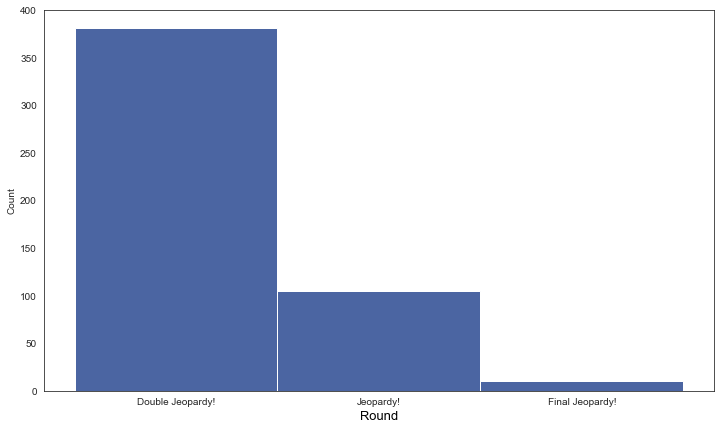

In [62]:
f,ax = plt.subplots(figsize=(12,7))
sns.histplot(data=round_category,x='Round',color= ([14/255,49/255,131/255]))
ax.set_xlabel('Round',color = 'black', fontsize=13)

In [29]:
random.choice(jp.Question)

'For his 11th labor, Hercules stole these from the tree guarded by the Hesperides'

In [36]:
def jeopardy():
    points = 0
    while points < 3000:
        category = input("What Category do you want to play? (BEFORE & AFTER, SCIENCE, LITERATURE, AMERICAN HISTORY)")
        df = jp[jp['Category'] == category]
        while len(df) == 0:
            category = input("What Category do you want to try? (BEFORE & AFTER, SCIENCE, LITERATURE, AMERICAN HISTORY)")
            df = jp[jp['Category'] == category]
        print("You've selected the category: {}".format(category))
        random_question = random.choice(jp.Question)
        random_row = jp[jp['Question'] == random_question]
        round_problem = random_row['Round']
        point_problem = random_row['Value']
        answer_problem = random_row['Answer']
        print("This question is..... {0} and {1} dollar".format(round_problem,point_problem))
        print("Please listen carefully. {}".format(random_row['Question']))
        print(answer_problem)
        answer = input('You got 10 seconds to answer.. What is your answer?')
        if answer == answer_problem:
            points += point_problem
            print("You got it...right! You've earned {}".format(point_problem))
        else:
            print("I'm sorry. Your answer is incorrect")
    print("You've earned enough. {}".format(points))
                       
    
    

In [37]:
jeopardy()

What Category do you want to play? (BEFORE & AFTER, SCIENCE, LITERATURE, AMERICAN HISTORY)SCINECE
What Category do you want to try? (BEFORE & AFTER, SCIENCE, LITERATURE, AMERICAN HISTORY)SCIENCE
You've selected the category: SCIENCE
This question is..... 128063    Jeopardy!
Name: Round, dtype: object and 128063    $800
Name: Value, dtype: object dollar
Please listen carefully. 128063    It's a good day to warm up with a bowl of this thick hearty vegetable soup, from the Italian for "something served"
Name: Question, dtype: object
128063    minestrone
Name: Answer, dtype: object
You got 10 seconds to answer.. What is your answer?moon


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
category = jp.Category.value_counts().head(5)

In [ ]:
category

In [ ]:
jp[jp['Category'] == 'LITERATURE']